In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/USArrests.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [13]:
df.shape

(50, 4)

In [5]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [6]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [7]:
scale(df)  #above data is not normal so the varince is shifted to Assault using scale we are standardizing it

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [8]:
X = pd.DataFrame(scale(df),index= df.index, columns=df.columns)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [9]:
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [14]:
X.std(),X.mean()

(Murder      1.010153
 Assault     1.010153
 UrbanPop    1.010153
 Rape        1.010153
 dtype: float64, Murder     -8.437695e-17
 Assault     1.298961e-16
 UrbanPop   -4.263256e-16
 Rape        8.326673e-16
 dtype: float64)

In [10]:
pca = PCA()

In [11]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.n_components_  #these are min(n-1,p) as p is 4 we ahve 4 as output

4

In [14]:
pca.components_  #there Phi11. phi12 so on

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [19]:
pca_loadings = pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4'],columns=['Murder','Assault','UrbanPop','Rape'])
pca_loadings

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


In [20]:
pca_loadings.T

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [22]:
PC_Scores = pd.DataFrame(pca.transform(X),index=df.index,columns=['PC1','PC2','PC3','PC4'])
PC_Scores.head()
#like Z1, Z2, values

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [15]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [16]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [17]:
pca.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

Creating Plot

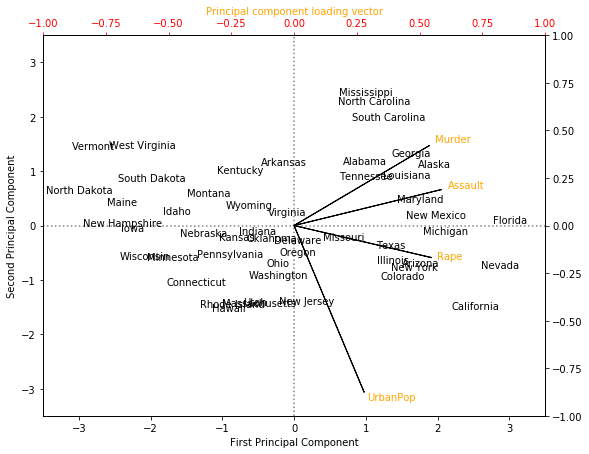

In [42]:
fig,ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

#plot PC1 and PC2

for i in PC_Scores.index:
    ax1.annotate(i, (PC_Scores.PC1.loc[i],PC_Scores.PC2.loc[i]),ha='center')

#plot refernce line
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

#plot principal component loading vectors using a second y-axis

ax2 = ax1.twinx().twiny()
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax2.tick_params(axis ='both',colors='r')
ax2.set_xlabel('Principal component loading vector', color='orange')

#plot labels for vectors. variable a is small offset to separate arrow tip and text
a=1.05
for i in pca_loadings.T[['PC1','PC2']].index:
    ax2.annotate(i, (pca_loadings.T.PC1.loc[i]*a,pca_loadings.T.PC2.loc[i]*a), color='orange')
    
#plot vectors
ax2.arrow(0,0,pca_loadings.T.PC1[0],pca_loadings.T.PC2[0])
ax2.arrow(0,0,pca_loadings.T.PC1[1],pca_loadings.T.PC2[1])
ax2.arrow(0,0,pca_loadings.T.PC1[2],pca_loadings.T.PC2[2])
ax2.arrow(0,0,pca_loadings.T.PC1[3],pca_loadings.T.PC2[3])

Creating scree plot and cumulative sum plot

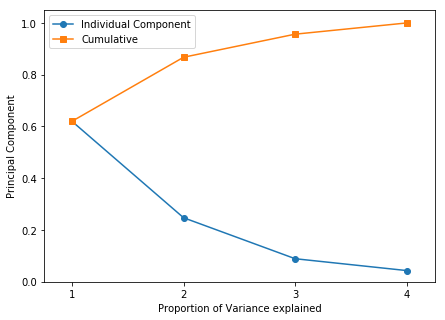

In [18]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4],pca.explained_variance_ratio_, '-o', label='Individual Component')
plt.plot([1,2,3,4],np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.xlabel('Proportion of Variance explained')
plt.ylabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);